### Found this awesome example from [Max Berggren](http://maxberggren.se/2016/11/21/right-labels/) which shows how to align legend labels to the right of each line plot automatically AND without overlap.  However, it does not work with Python 3.x and only works with series of the same length.  So I modified his code to address both of those issues.

To make his code work with Python 3.x, I replaced **```positons.iteritems()```** with **```positions.items()```**.  The tricky part was trying to figure out how to make this code work with series of different lengths.  After some searching around, I discovered pandas Series' **```last_valid_index()```** method.  So with this method, I can base the last x value position of my legend texts based on the last valid data point.

I also made slight modifications so that there is no need to manually type or identify the x column and the y columns since the purpose is to do this all automatically.  The user just has to ensure the x value column is the data frame index.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt  
import seaborn as sns
import pandas as pd
sns.set_style("whitegrid")
custom_style = {
            'grid.color': '0.8',
            'grid.linestyle': '--',
            'grid.linewidth': 0.5,
}
sns.set_style(custom_style)

Read in the csv file and make the 1st column ('Year') the index:

In [19]:
df = pd.read_csv('/home/pybokeh/Dropbox/python/jupyter_notebooks/matplotlib/percent-bachelors-degrees-women-usa.csv',
                index_col=0)

In [20]:
df.head()

,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
Year,,,,,,,,,,,,,,,,,
1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


In [8]:
def legend_positions(df, y):
    """ Calculate position of labels to the right in plot... """
    positions = {}
    for column in y:    
        # Get y value based on last valid index
        positions[column] = df[column][df[column].last_valid_index()] - 0.1

    def push():
        """ 
        ...by puting them to the last y value and 
        pushing until no overlap 
        """
        collisions = 0
        for column1, value1 in positions.items():
            for column2, value2 in positions.items():
                if column1 != column2:
                    dist = abs(value1-value2)
                    if dist < 2.5:
                        collisions += 1
                        if value1 < value2:
                            positions[column1] -= .1
                            positions[column2] += .1
                        else:
                            positions[column1] += .1
                            positions[column2] -= .1
                        return True
    while True:
        pushed = push()
        if not pushed:
            break
            
    return positions

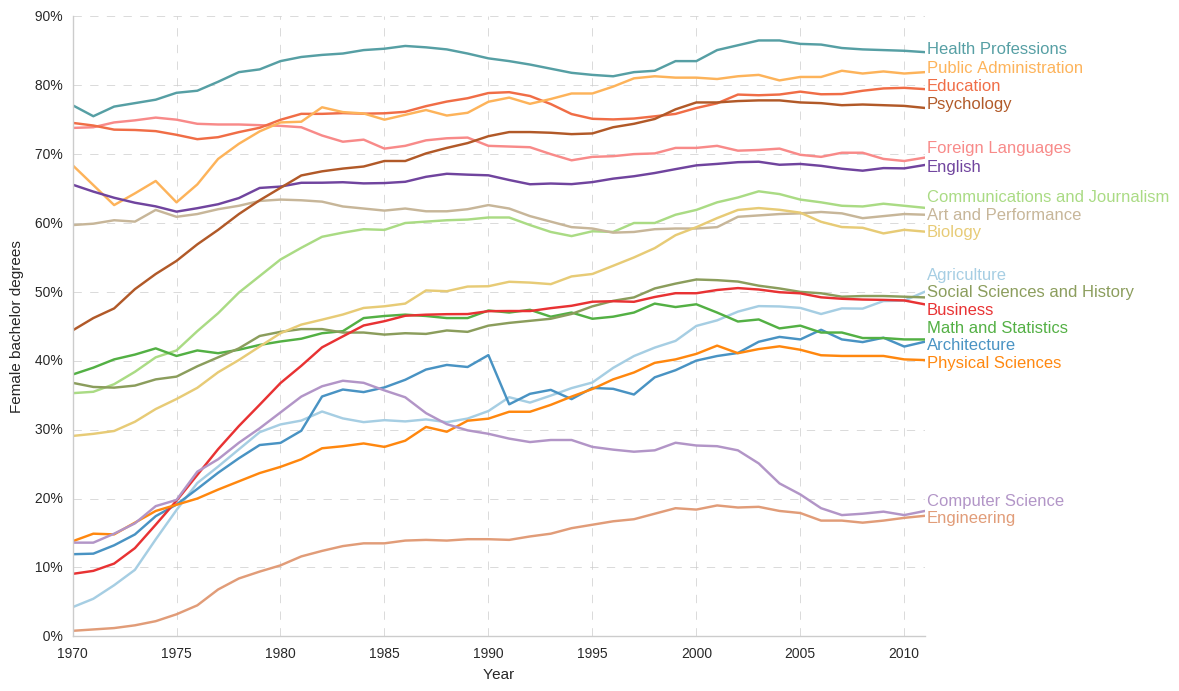

In [21]:
y = df.columns  # Identify the y columns
positions = legend_positions(df, y)

f, ax = plt.subplots(figsize=(11,8))        
cmap = plt.cm.get_cmap('Paired', len(y))

for i, (column, position) in enumerate(positions.items()):
    
    # Get a color
    color = cmap(float(i)/len(positions))
    # Plot each line separatly so we can be explicit about color
    ax = df.plot(y=column, legend=False, ax=ax, color=color)
    
    # Add the text to the right
    plt.text(
        # Get x value of the specific series column based on last valid index
        df[column].last_valid_index() + 0.1, 
        position, column, fontsize=12, 
        color=color # Same color as line
    ) 
ax.set_ylabel('Female bachelor degrees')
# Add percent signs
ax.set_yticklabels(['{:3.0f}%'.format(x) for x in ax.get_yticks()]) 
sns.despine()

#### The data set above contains series with equal lengths or same number of data points.   Let's test the script against a data set with series of different lengths or different number of data points.

Read in a csv file that contains 2 series with different number of data points. Make the 1st column ('Month') the index:

In [22]:
df = pd.read_csv('/home/pybokeh/Dropbox/python/jupyter_notebooks/matplotlib/defect_rate.csv', index_col=0)

In [23]:
df

,Comp_A,Comp_B
Month,,
0,0.00,0.00
1,0.32,0.27
2,0.38,0.33
3,0.50,0.45
4,0.55,0.50
5,0.67,0.62
6,0.80,0.75
7,0.99,NaN
8,1.20,NaN


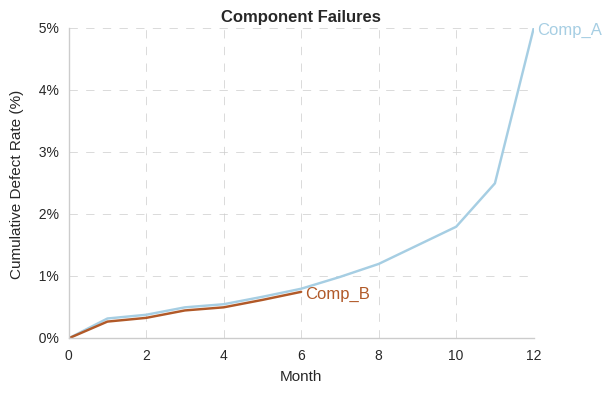

In [24]:
y = df.columns
positions = legend_positions(df, y)

f, ax = plt.subplots(figsize=(6, 4))        
cmap = plt.cm.get_cmap('Paired', len(y))

for i, (column, position) in enumerate(positions.items()):
    
    # Get a color
    color = cmap(float(i)/len(positions))
    # Plot each line separatly so we can be explicit about color
    ax = df.plot(y=column, legend=False, ax=ax, color=color)
    
    # Add the text to the right
    plt.text(
        # Get x value of the specific series column based on last valid index
        df[column].last_valid_index() + 0.1, 
        position, column, fontsize=12, 
        color=color # Same color as line
    ) 
ax.set_ylabel('Cumulative Defect Rate (%)')
# Add percent signs
ax.set_yticklabels(['{:3.0f}%'.format(x) for x in ax.get_yticks()])
ax.set_title("Component Failures", weight='bold')
sns.despine()

### It worked!